In [6]:
!pip install mne
!pip install numpy
!pip install matplotlib
!pip install nilearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import ttest_ind, ttest_rel

## Cheatsheet
This markdown cell introduces a few python tricks that are useful for solving the tasks.

### Numpy functions
- `arr = np.array([1, 2, 3])` creates a numpy array.
- `arr.shape` returns the shape of the array.
- `arr.mean()` returns the mean of the array.
- `arr.mean(axis=x)` returns the mean of axis x.
- `arr.std()` returns the standard deviation of the array.
- `arr.std(axis=1)` returns the standard deviation of the second axis (remember that python is zero-indexed).



### Matplotlib

If you are not to familiar with plotting in python, you can look up the matplotlib [documentation](https://matplotlib.org/stable/). Here is a simple example to get you started:


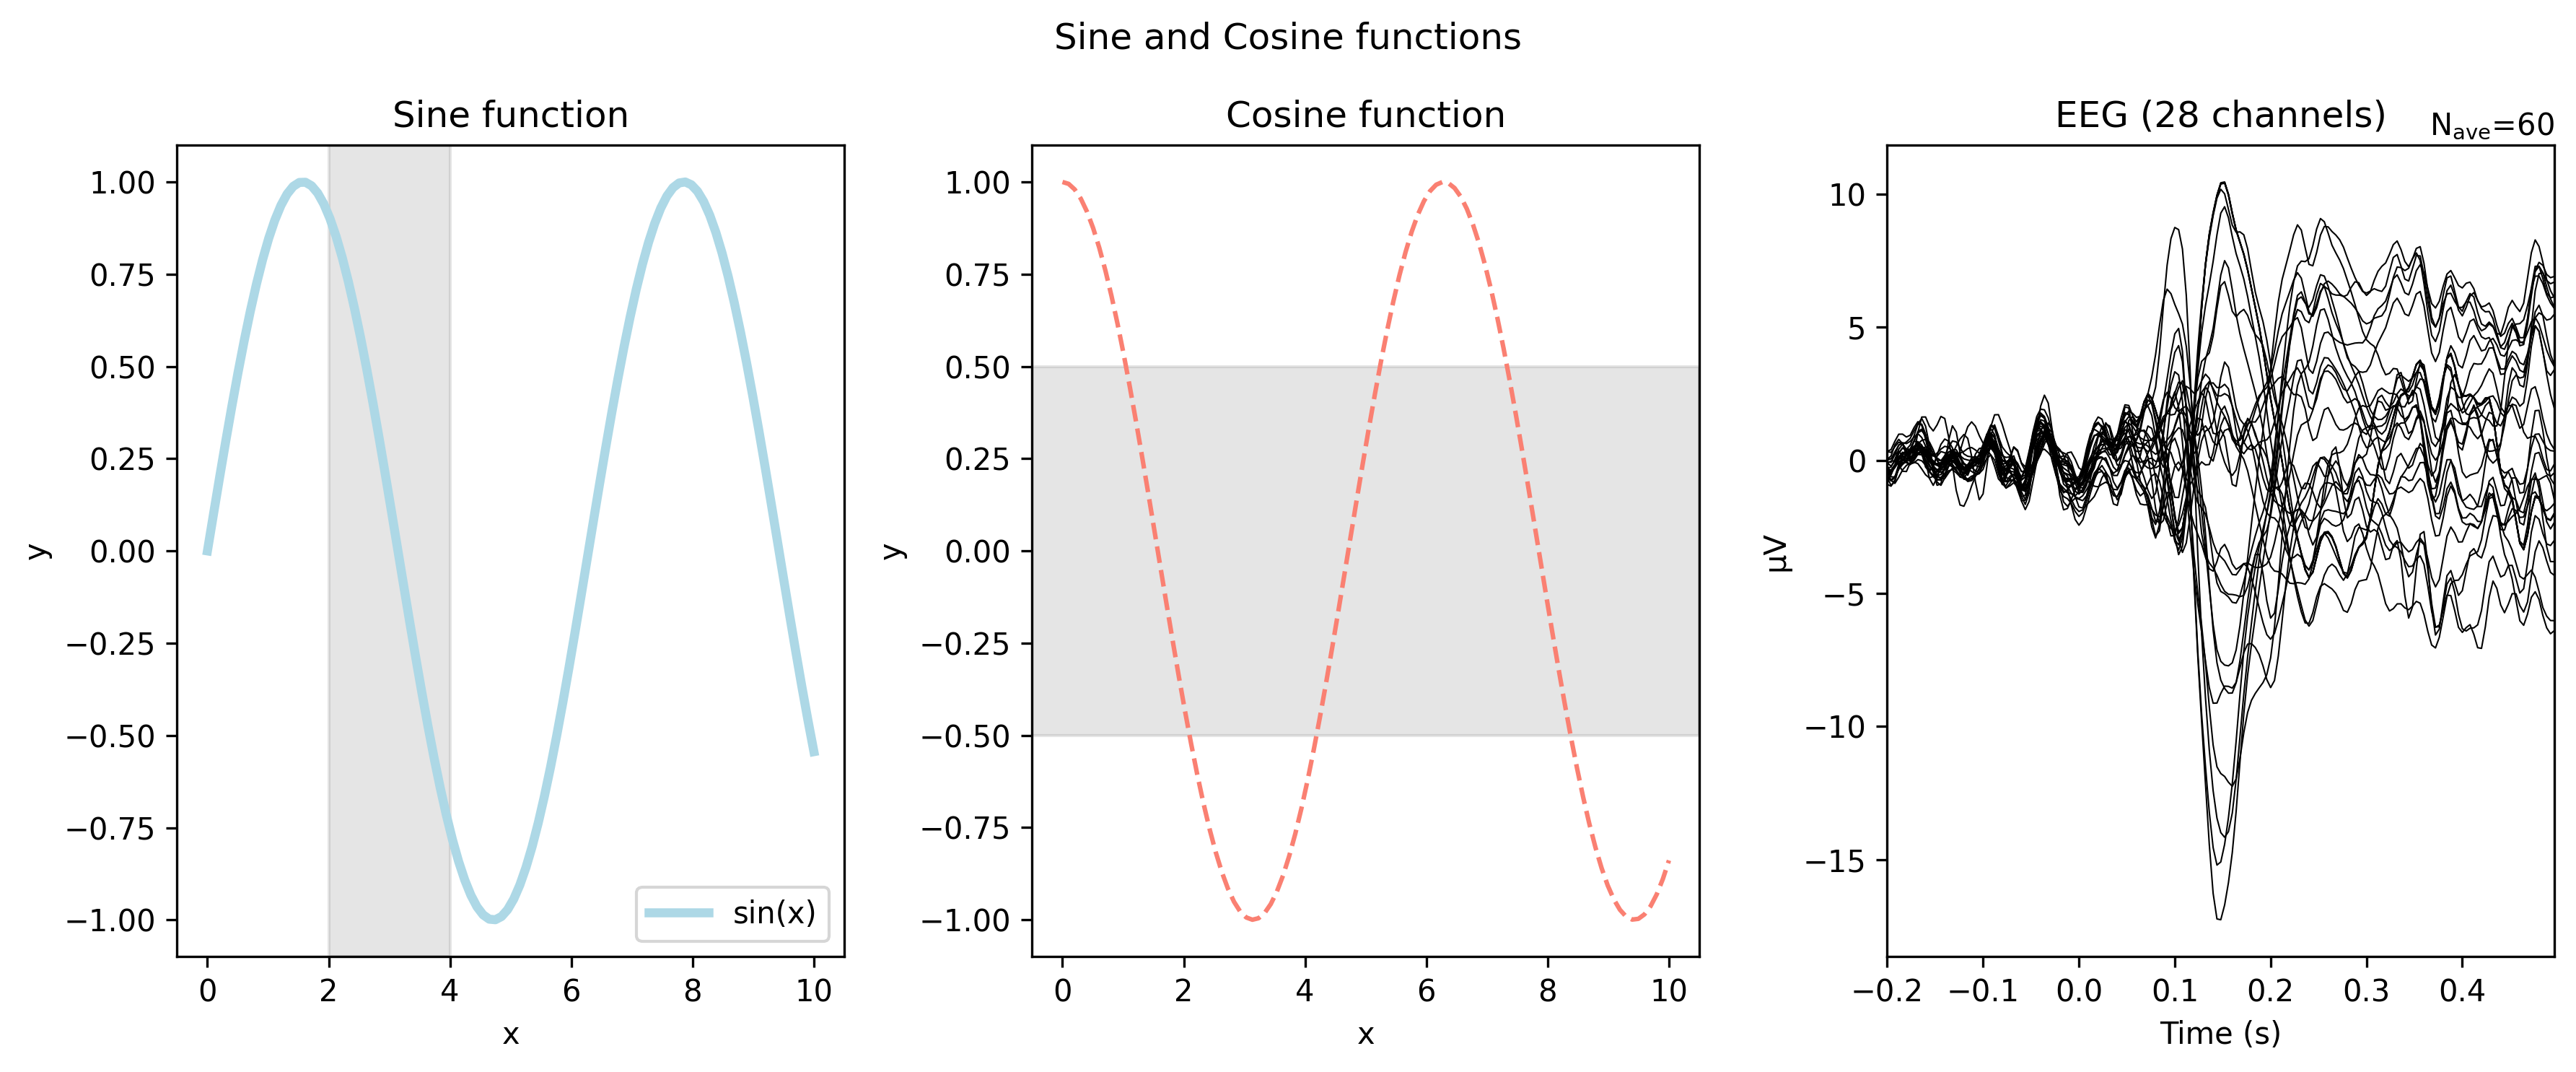

In [8]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)


# creating an empty "canvas" with two axes to draw the plots on
# 1 row, 2 columns
# fig size controls the height and width of the canvas
# dpi controls the resolution (is by default pretty low and often gives pixelated plots. I find that 300 is a good value for most purposes)
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=300) 

# plot on the first axies
axes[0].plot(x, y1, label='sin(x)', color='lightblue', linewidth=3)

# plot on the second axis
axes[1].plot(x, y2, label='cos(x)', color='salmon', linestyle='--')

# some mne plotting functions allows you to pass the axes as an argument
# use mne plotting functions to plot on the third axis
data_path = Path("/work/EEG_lab/example_data")
epochs = mne.read_epochs(data_path / f"Group1-epo.fif", verbose=False, preload=True)
mne.viz.plot_evoked(epochs["Image"].average(), axes=axes[2], show=False)

fig.suptitle('Sine and Cosine functions')
axes[0].set_title('Sine function')
axes[1].set_title('Cosine function')

# add a legend to the plot
axes[0].legend()

# add some labels to the axes
for ax in axes[:2]: # do not change labels on mne plot on the third axis
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# mark a specific interval on the x-axis
axes[0].axvspan(2, 4, color="grey", alpha=0.2)

# mark a specific interval on the y-axis
axes[1].axhspan(-0.5, 0.5, color="grey", alpha=0.2)

plt.tight_layout()


# Dataset
During this class we will be working with some preprocessed data from last years FaceWord experiements.

# Visualisation task 1
I have prepared some code for you to get started with the first task. You can find it in the next cells. The data is loaded and a t-test is performed. 

In [9]:
# loading in the data
data_path = Path("/work/EEG_lab/example_data")

epochs = mne.read_epochs(data_path / f"Group1-epo.fif", verbose=False, preload=True)

# only keep eeg channels
epochs.pick(["eeg"])

Number of events,240
Events,Correct/wNeg: 19Correct/wNeu/iNeg: 8Correct/wPos: 18Image/wNeg: 20Image/wNeu/iNeg: 8Image/wNeu/iPos: 12Image/wPos: 20Incorrect/wNeg: 2Incorrect/wNeu/iPos: 12Incorrect/wPos: 1Wait/wNeg: 20Wait/wNeu/iNeg: 8Wait/wNeu/iPos: 12Wait/wPos: 20Word/wNeg: 20Word/wNeu: 20Word/wPos: 20
Time range,-0.200 – 0.496 s
Baseline,-0.200 – 0.000 s


In [10]:
# CODE FOR CONDUCTING T-TEST

# extracting the data for words and images
epochs_word = epochs["Word"] 
epochs_image = epochs["Image"] 

# picks of channels and time points to use for the t-test
picks = ["O1", "Oz", "O2"]

# time window in seconds
tmin, tmax = 0.1, 0.2

# extract the data for the time window and channels
data_word = epochs_word.get_data(picks = picks, tmin = tmin, tmax = tmax)
data_image = epochs_image.get_data(picks = picks, tmin = tmin, tmax = tmax)


# the shape of the data is (number of trials, number of channels, number of time points)
print(data_word.shape) 
print(data_image.shape)

# average over time points and channels to get a single value for each trial
data_ttest_word = data_word.mean(axis = (1, 2))
data_ttest_image = data_image.mean(axis = (1, 2))

# conduct the t-test
ttest_ind(data_ttest_word, data_ttest_image)


(60, 3, 25)
(60, 3, 25)


TtestResult(statistic=-0.3118441408627894, pvalue=0.7557093047688821, df=118.0)

## Create plot(s)

Now it is your turn to create a plot. You might want to plot not only the specific time window used for the t-test but also the whole time window. Therefore, I have extracted the data for the whole time window for you below:

In [11]:
# extract the data for from the specified channels
data_word_plot = epochs_word.get_data(picks = picks)
data_image_plot = epochs_image.get_data(picks = picks)

(60, 3, 175)

**Potential considerations:**
- How can you best visualise the signal in the two conditions?
- How can you best visualise the variability in the data?
- How can you best visualise the difference between the two conditions?
- Can we somehow guide the reader towards the time window of interest (defined a priori -> tmin & tmax)?
- Can we include some information about which sensors were chosen in the plot?

For this task you might consider how to best visualise both the average for each condition, but also include some measure of variablity (e.g. standard deviation or just plotting the signal from each trial seperately). 

Maybe you also want to include a plot indicating which sensors were chosen. As the research question is about the difference between the two conditions, you might also want to include a plot that shows the difference between the two conditions. 

You can choose to work with the data as arrays (data_word_plot, data_face_plot) or you can use the plotting functions from the MNE library on the extracted epochs (epochs_word and epochs_image). It is also possible to combine the two as shown in the plotting example at the start of this notebook.


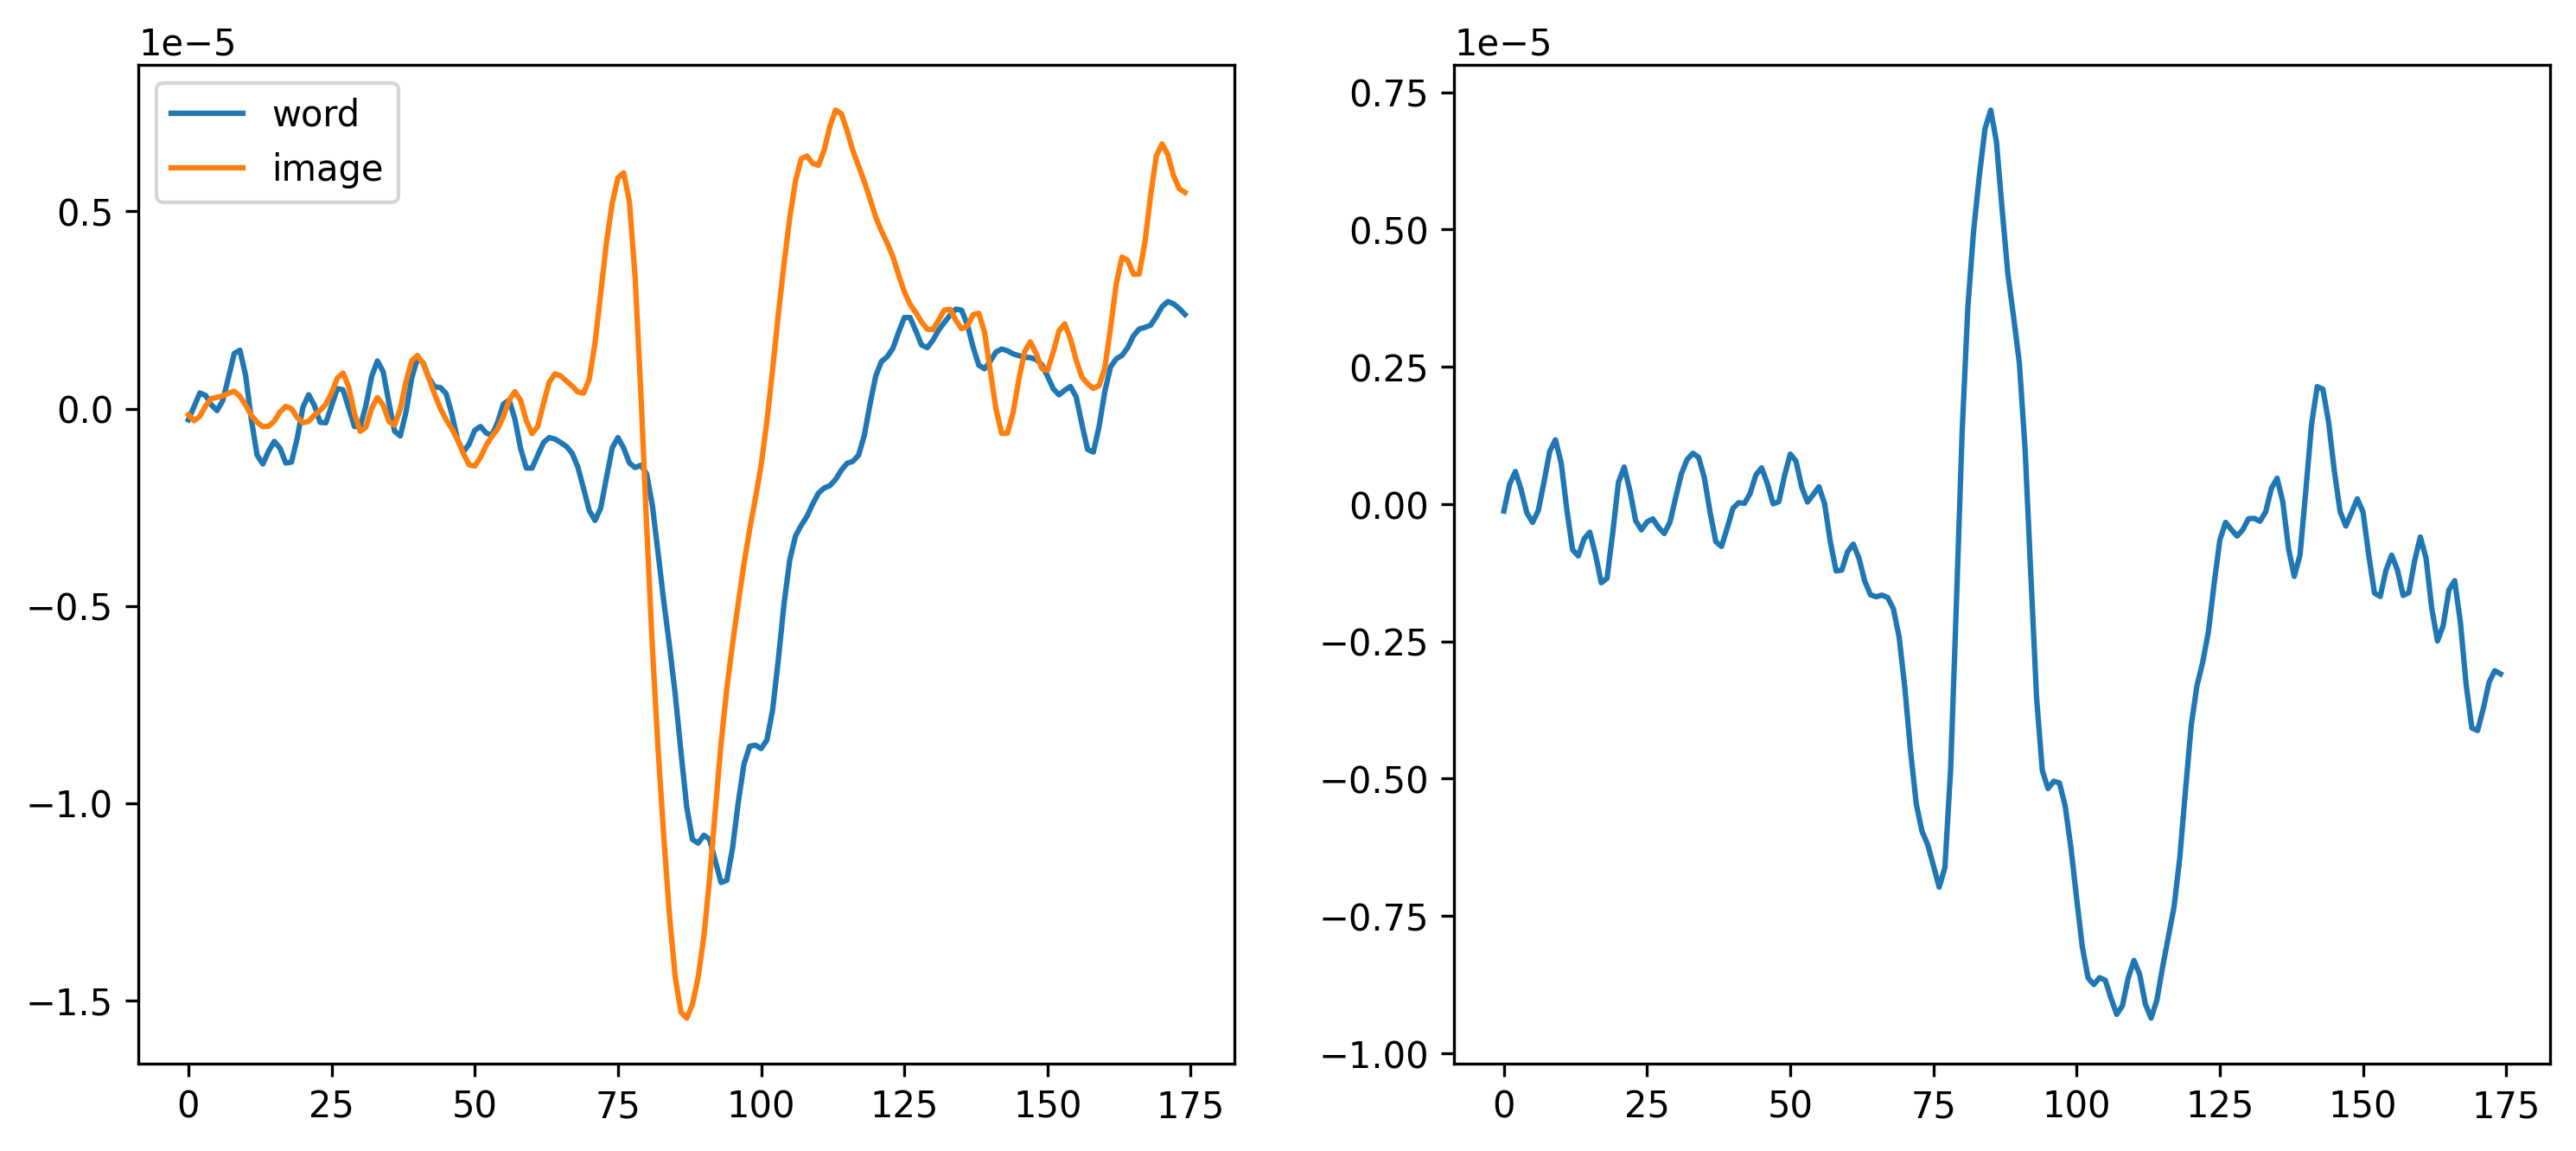

In [29]:
n_rows, n_cols = 1, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5), dpi=300)

# INSERT PLOTTING CODE HERE! 


# simple plot averaging
data_word_plot_avg = data_word_plot.mean(axis = (0, 1))
axes[0].plot(data_word_plot_avg, label = "word")

data_image_plot_avg = data_image_plot.mean(axis = (0, 1))
axes[0].plot(data_image_plot_avg, label = "image")

axes[0].legend()

# now lets plot the difference
difference = data_word_plot_avg - data_image_plot_avg

axes[1].plot(difference)


In [46]:
# extracting the times
timepoints = epochs.times

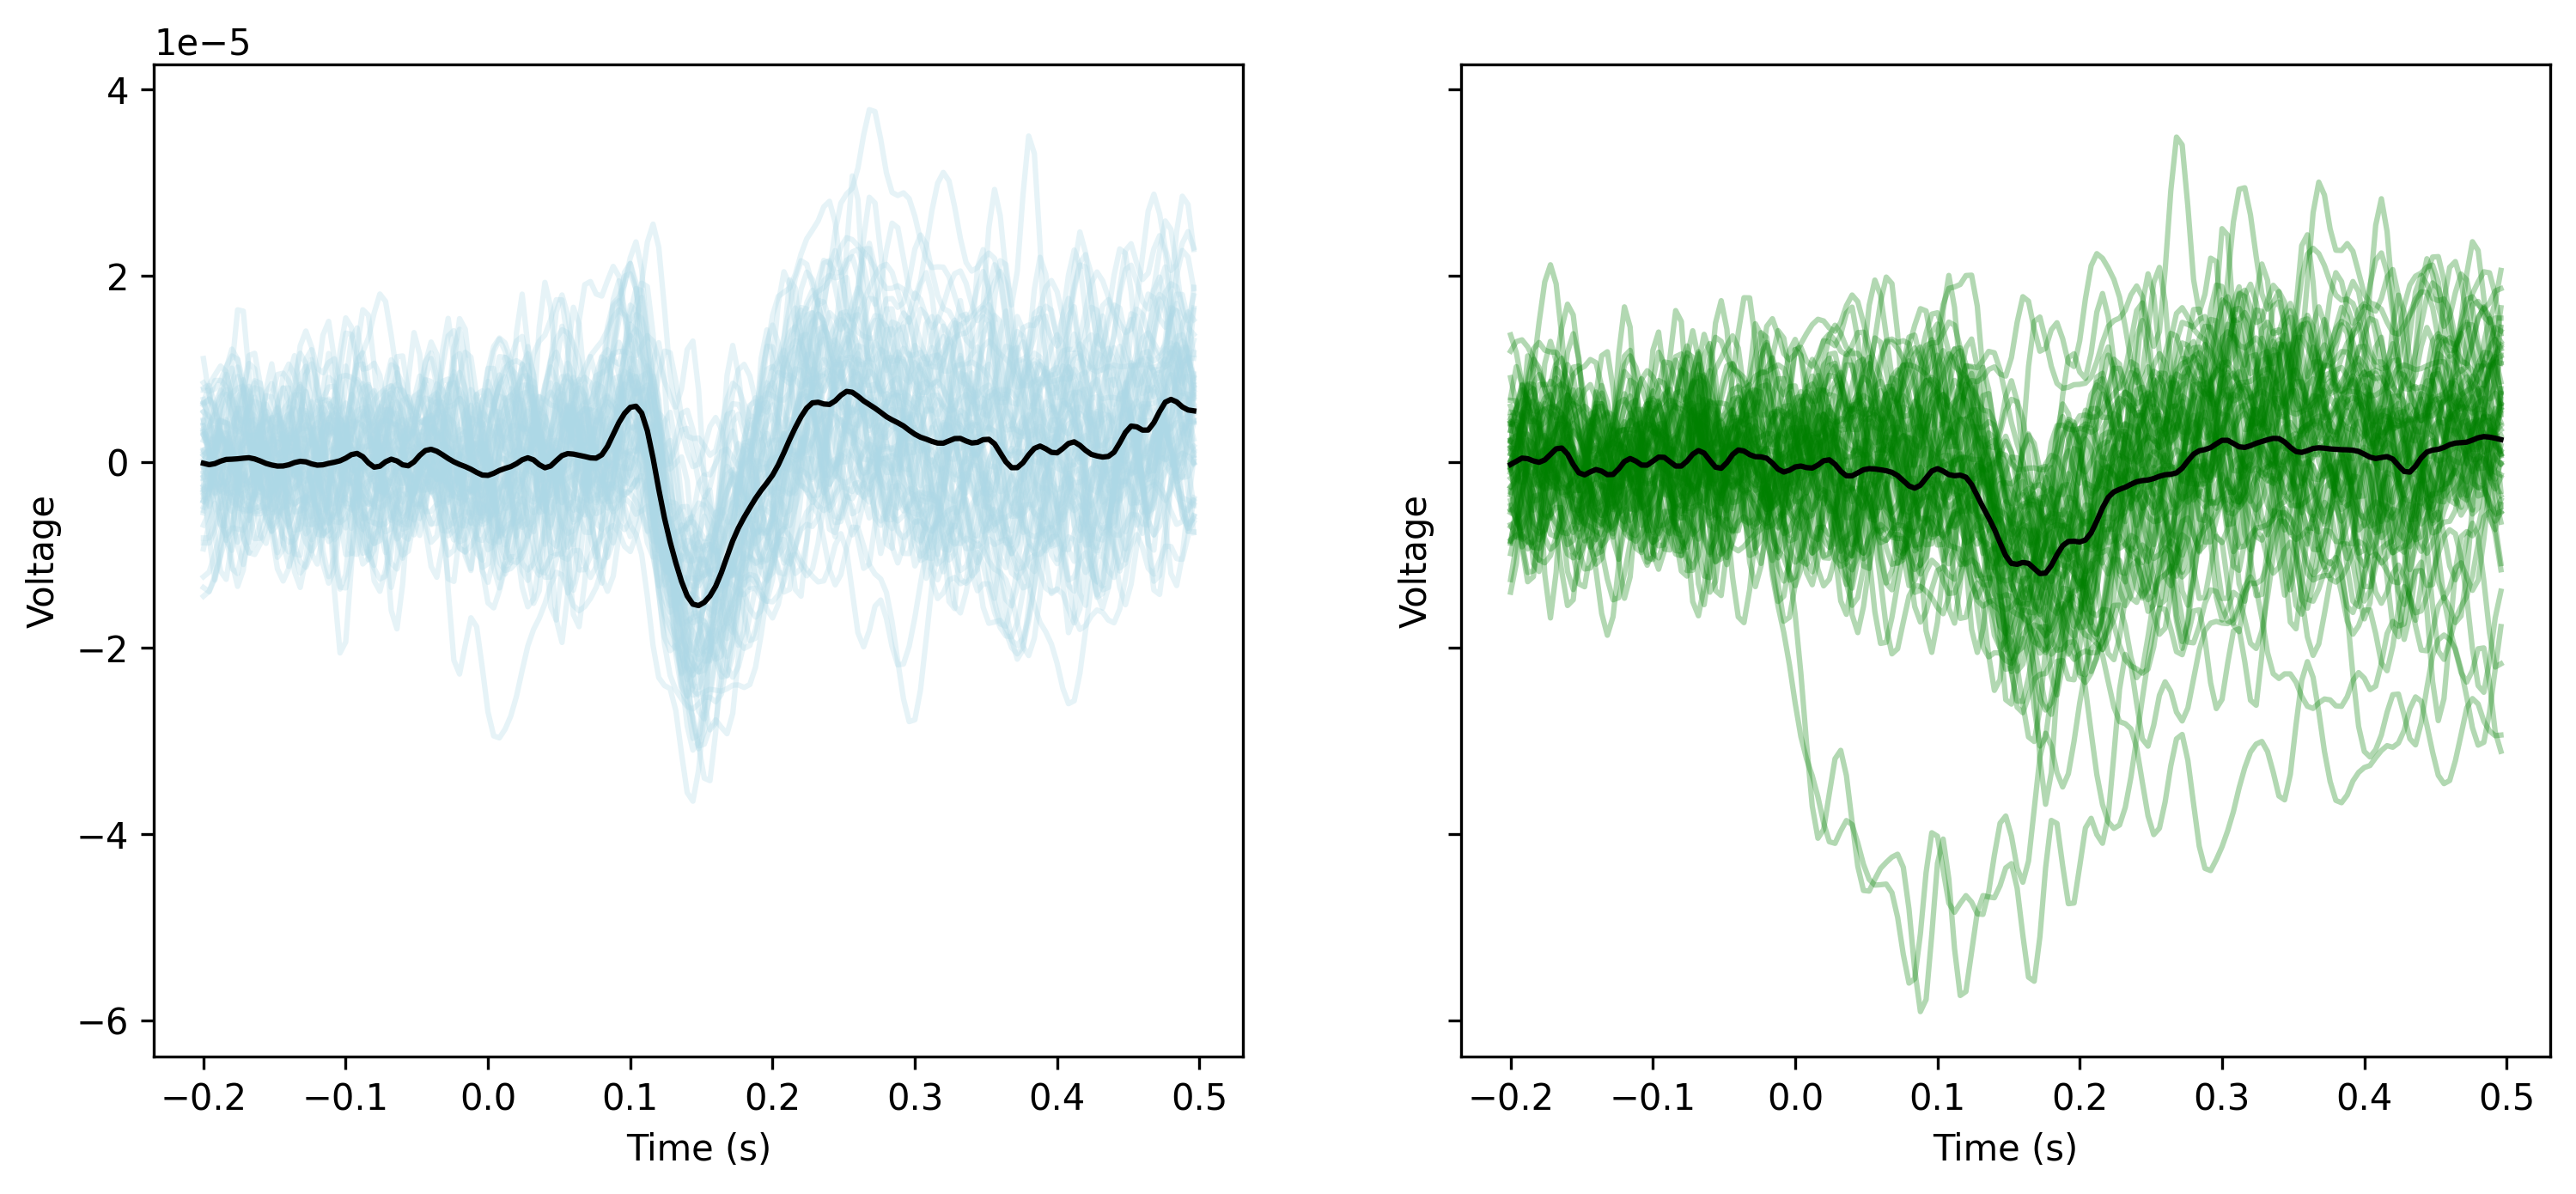

In [49]:
n_rows, n_cols = 1, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5), dpi=300, sharey= True)

# now lets plot some of the variability as well!
data_image_plot_avg = data_image_plot.mean(axis = 1)

# transposing so we are plotting the timepoits for each trial, and not the trials for each timepoint
axes[0].plot(timepoints, data_image_plot_avg.T, label = "image", color = "lightblue", alpha = 0.3)

# also plotting the average
axes[0].plot(timepoints, data_image_plot_avg.mean(axis = 0), color = "k")


data_word_plot_avg = data_word_plot.mean(axis = 1)

# transposing so we are plotting the timepoits for each trial, and not the trials for each timepoint
axes[1].plot(timepoints, data_word_plot_avg.T, label = "word", color = "green", alpha = 0.3)

# also plotting the average
axes[1].plot(timepoints, data_word_plot_avg.mean(axis = 0), color = "k")

for ax in axes:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Voltage")

combining channels using "mean"
combining channels using "mean"


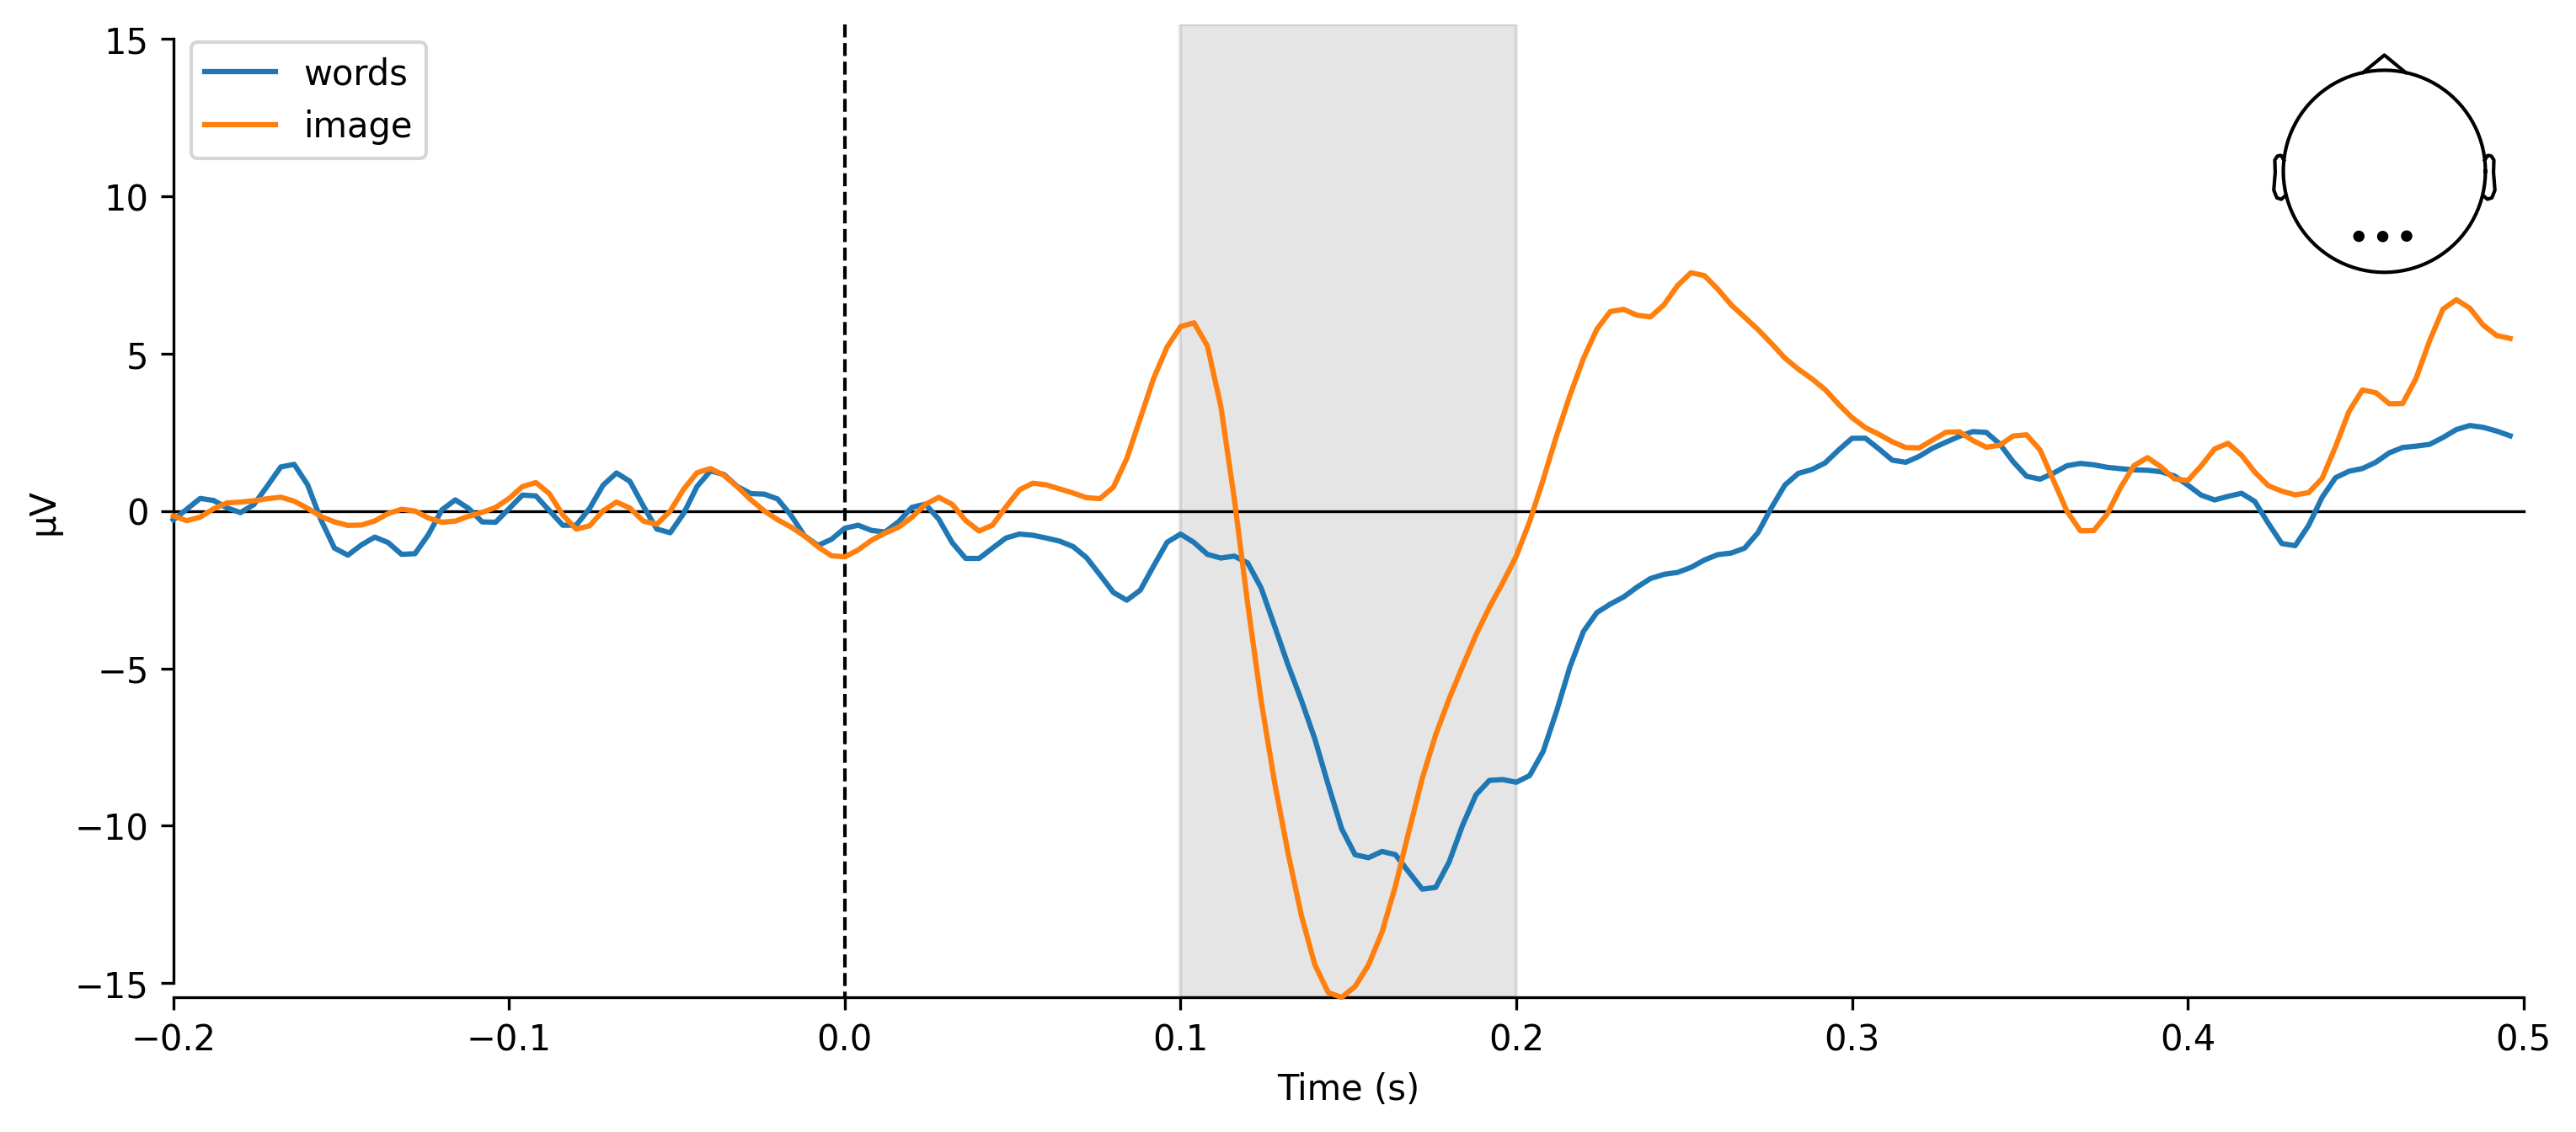

In [57]:
# example showing that you can hack MNE functions!!

fig, ax = plt.subplots(1, 1, figsize = (12, 5), dpi = 300)

# using MNE plotting function that we know
mne.viz.plot_compare_evokeds(
    {"words": epochs_word.average(picks=picks), "image": epochs_image.average(picks=picks)},
    axes = ax, # specifying that we want to plot on the "canvas" aka ax we just created
    show = False,
    show_sensors = True,
    combine = "mean"

)

ax.axvspan(tmin, tmax, color="grey", alpha=0.2)
